In [2]:

import numpy as np
import matplotlib.pyplot as plt
import os
from astropy.io import fits
from astropy.table import Table
from astropy.time import Time
%matplotlib inline
from matplotlib.colors import LogNorm
import pandas as pd

from fits_align.ident import make_transforms
from fits_align.align import affineremap
from glob import glob

from astropy.modeling.models import Gaussian2D
from photutils.datasets import make_noise_image
from photutils.isophote import EllipseGeometry
from photutils.aperture import EllipticalAperture
from photutils.isophote import EllipseSample, EllipseFitter

from lmfit import Model



In [4]:
tmp_dir = r"C:\Users\HP Elitebook\isya2024\Roger Hajjar\NGC7793\NGC7793 V\lco_data-20240926-14 (1)"

img_list = sorted(glob(os.path.join(tmp_dir,"*-e91.fits.fz")))
ref_image = img_list[0]
images_to_align = img_list[1:]

identifications = make_transforms(ref_image, images_to_align)

In [5]:
aligned_images = [ref_image]
for id in identifications:
    if id.ok:
        alignedimg = affineremap(id.ukn.filepath, id.trans, outdir=tmp_dir)
        aligned_images.append(alignedimg)
        print(alignedimg)


for i in range(1, len(aligned_images)+1):
    if i==1:
        fits_file = fits.open(aligned_images[i-1])
        print(fits_file[1].data.shape)
    else:
        fits_file = fits.open(aligned_images[i-1])
        print(fits_file[0].data.shape)

C:\Users\HP Elitebook\isya2024\Roger Hajjar\NGC7793\NGC7793 V\lco_data-20240926-14 (1)\lsc0m409-kb29-20201201-0142-e91.fits_affineremap.fits
C:\Users\HP Elitebook\isya2024\Roger Hajjar\NGC7793\NGC7793 V\lco_data-20240926-14 (1)\lsc0m409-kb29-20201201-0145-e91.fits_affineremap.fits
C:\Users\HP Elitebook\isya2024\Roger Hajjar\NGC7793\NGC7793 V\lco_data-20240926-14 (1)\lsc0m412-kb26-20190731-0289-e91.fits_affineremap.fits
C:\Users\HP Elitebook\isya2024\Roger Hajjar\NGC7793\NGC7793 V\lco_data-20240926-14 (1)\lsc0m412-kb26-20190731-0292-e91.fits_affineremap.fits
C:\Users\HP Elitebook\isya2024\Roger Hajjar\NGC7793\NGC7793 V\lco_data-20240926-14 (1)\lsc0m412-kb26-20201201-0075-e91.fits_affineremap.fits
C:\Users\HP Elitebook\isya2024\Roger Hajjar\NGC7793\NGC7793 V\lco_data-20240926-14 (1)\lsc0m412-kb26-20201201-0078-e91.fits_affineremap.fits
(2042, 3054)
(2042, 3054)
(2042, 3054)
(2042, 3054)
(2042, 3054)
(2042, 3054)
(2042, 3054)


In [6]:

file_fits = r'C:\Users\HP Elitebook\isya2024\Roger Hajjar\NGC7793\NGC7793 V\lco_data-20240926-14 (1)\lsc0m409-kb29-20201201-0142-e91.fits_affineremap.fits'
hd189733_image = fits.open(file_fits)
hd_imdata = hd189733_image[0].data
print(np.min(hd_imdata), np.max(hd_imdata), np.mean(hd_imdata), np.median(hd_imdata), np.std(hd_imdata))

-6518.714 28712.992 136.01906 135.56094 59.355515


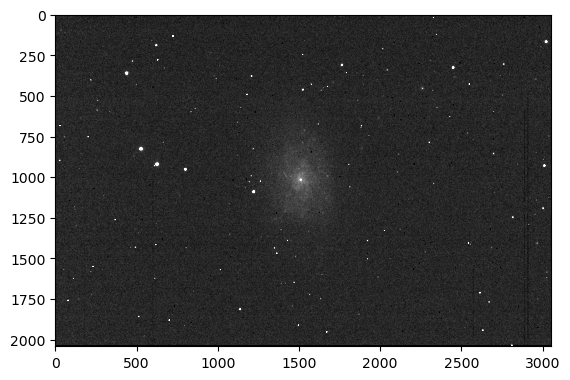

In [71]:
plt.imshow(hd189733_image[0].data, cmap = 'gray',  vmin=120, vmax=220)

plt.savefig('Presentation1.png')

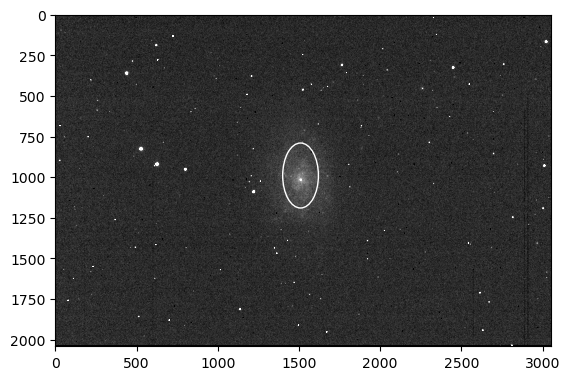

In [58]:
geometry = EllipseGeometry(x0=1510, y0=990, sma=200, eps=0.45,
                           pa=90.0 * np.pi / 180.0)

aper = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,
                          geometry.sma * (1 - geometry.eps),
                          geometry.pa)
plt.imshow(hd189733_image[0].data, cmap = 'gray',  vmin=120, vmax=210)
aper.plot(color='white')
plt.savefig('Presentation2.png')

(<matplotlib.patches.Ellipse at 0x28f8f51bfb0>,)

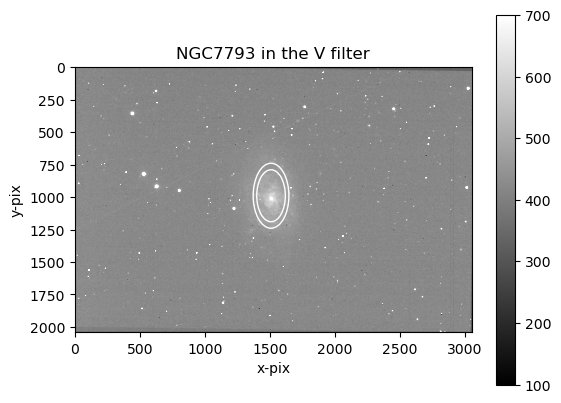

In [12]:
V= [r'C:\Users\HP Elitebook\isya2024\Roger Hajjar\NGC7793\NGC7793 V\lco_data-20240926-14 (1)\lsc0m409-kb29-20201201-0142-e91.fits_affineremap.fits',
    r'C:\Users\HP Elitebook\isya2024\Roger Hajjar\NGC7793\NGC7793 V\lco_data-20240926-14 (1)\lsc0m409-kb29-20201201-0145-e91.fits_affineremap.fits',
    r'C:\Users\HP Elitebook\isya2024\Roger Hajjar\NGC7793\NGC7793 V\lco_data-20240926-14 (1)\lsc0m412-kb26-20190731-0289-e91.fits_affineremap.fits',
    r'C:\Users\HP Elitebook\isya2024\Roger Hajjar\NGC7793\NGC7793 V\lco_data-20240926-14 (1)\lsc0m412-kb26-20190731-0292-e91.fits_affineremap.fits',
    r'C:\Users\HP Elitebook\isya2024\Roger Hajjar\NGC7793\NGC7793 V\lco_data-20240926-14 (1)\lsc0m412-kb26-20201201-0075-e91.fits_affineremap.fits',
    r'C:\Users\HP Elitebook\isya2024\Roger Hajjar\NGC7793\NGC7793 V\lco_data-20240926-14 (1)\lsc0m412-kb26-20201201-0078-e91.fits_affineremap.fits']

    

v1= fits.open(V[0])
v2= fits.open(V[1])
v3= fits.open(V[2]) 
v4= fits.open(V[3])
v5= fits.open(V[4])
v6= fits.open(V[5])

image_concat_V = [v1[0].data,v2[0].data,v3[0].data,v4[0].data,v5[0].data,v6[0].data]
final_image_V = np.sum(image_concat_V, axis=0)

plt.imshow(final_image_V, cmap='gray',vmin=100,vmax=700)
plt.colorbar()
plt.title('NGC7793 in the V filter')
plt.xlabel('x-pix')
plt.ylabel('y-pix')



geometry = EllipseGeometry(x0=1510, y0=990, sma=250, eps=0.45,
                           pa=90.0 * np.pi / 180.0)
aper = EllipticalAperture((geometry.x0, geometry.y0) , geometry.sma,
                          geometry.sma * (1 - geometry.eps),
                          geometry.pa)


geometry1 = EllipseGeometry(x0=1510, y0=990, sma=200, eps=0.45,
                            pa=90.0 * np.pi / 180.0)
aper1 = EllipticalAperture((geometry1.x0, geometry1.y0) , geometry1.sma,
                          geometry1.sma * (1 - geometry1.eps),
                          geometry1.pa)




plt.imshow(final_image_V, cmap = 'gray',  vmin=100, vmax=600)
aper.plot(color='white')
aper1.plot(color='white')



In [13]:
from photutils.isophote import Ellipse
ellipse = Ellipse(final_image_V, geometry)

isolist = ellipse.fit_image()

# Extract intensities
intensities = [iso.intens for iso in isolist]  # List comprehension to get intensities

# Print or use the intensities
print(intensities)

[2379.3035427377445, 2335.720996506781, 2329.7807400770685, 2323.0587539768344, 2302.992564126298, 2280.634175164813, 2236.359726542688, 2212.849083357936, 2195.6559114005013, 2163.876347834833, 2115.1506934869544, 2053.388873426768, 1994.4852465300844, 1932.7666235797865, 1852.4545987692215, 1748.8643590139384, 1642.710850620885, 1538.0009973580115, 1428.5029694093464, 1338.7625831490777, 1251.7533024855118, 1161.6936184714402, 1067.1394049876517, 984.875772474182, 910.1435125160609, 846.8741757011937, 795.4576551594628, 751.1469917974205, 703.518947122894, 675.7948551283513, 642.1477084848699, 620.7167130660479, 608.5908973190041, 611.6332840951494, 597.4930597805512, 578.9293865328942, 569.0353338825724, 562.5992198693558, 564.2164908631061, 552.7204962765, 548.6392420791758, 542.4214786357553, 533.4119578074599, 529.0055377921691, 524.8239526114278, 514.6621367034622, 503.8705569341425, 504.56101901235905, 498.3655517854374, 481.97351989424453, 482.33213849505347, 469.5537430195281

In [14]:
sma_values = [iso.sma for iso in isolist]
print(sma_values)

[0.0, 0.509818362113991, 0.5608001983253902, 0.6168802181579293, 0.6785682399737222, 0.7464250639710944, 0.8210675703682039, 0.9031743274050243, 0.9934917601455268, 1.0928409361600795, 1.2021250297760875, 1.3223375327536964, 1.454571286029066, 1.6000284146319728, 1.76003125609517, 1.9360343817046872, 2.129637819875156, 2.342601601862672, 2.576861762048939, 2.834547938253833, 3.1180027320792165, 3.4298030052871384, 3.7727833058158526, 4.150061636397438, 4.565067800037182, 5.021574580040901, 5.523732038044991, 6.07610524184949, 6.683715766034439, 7.3520873426378825, 8.087296076901671, 8.896025684591839, 9.785628253051023, 10.764191078356125, 11.84061018619174, 13.024671204810913, 14.327138325292005, 15.759852157821205, 17.335837373603326, 19.06942111096366, 20.976363222060026, 23.07399954426603, 25.381399498692634, 27.9195394485619, 30.711493393418092, 33.7826427327599, 37.16090700603589, 40.87699770663948, 44.964697477303424, 49.46116722503377, 54.407283947537145, 59.848012342290865, 65

In [15]:
print(isolist.pa)

[0.         1.63563621 1.64231049 1.64752183 1.64638059 1.69331896
 2.1312364  2.43675695 2.64560215 2.69793827 2.65445202 2.65445202
 2.49022049 2.38087605 2.39250422 2.45846675 2.30443395 2.30443395
 1.94394737 0.84574042 0.93356139 0.93822505 1.03324692 1.19167492
 1.24473694 1.23458376 1.11864625 1.12767602 1.2851338  1.72634194
 1.49220526 1.49220526 1.49220526 1.08363521 0.8832943  0.65910205
 0.65910205 0.83136803 1.01225274 0.97386088 1.48820243 1.48820243
 0.61040924 1.48820243 1.32014371 1.48820243 1.61899154 1.55623799
 1.72929791 1.95558772 1.95558772 1.95558772 1.50675552 1.48820243
 1.48820243 1.54965827 1.34722723 1.34722723 1.34722723 1.19550758
 1.37038587 1.52182834 1.37296405 1.35147582 1.45632064 1.43428173
 1.48820243 1.48820243 1.41496294 1.43428173 1.43428173 1.43428173]


In [16]:
isolist.to_table()

sma,intens,intens_err,ellipticity,ellipticity_err,pa,pa_err,grad,grad_error,grad_rerror,x0,x0_err,y0,y0_err,ndata,nflag,niter,stop_code
,,,,,deg,deg,,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,float64,float64,float64,int32,int32,int32,int32
0.0,2379.3035427377445,0.0,0.0,0.0,0.0,0.0,0.0,None,None,1512.9636075852538,0.0,1018.6952104758852,0.0,1,0,0,0
0.509818362113991,2335.720996506781,3.3604019968219334,0.4850814341874485,0.07748297083961551,93.71505189511309,6.238540872670258,-155.6690091362249,106.40443405249442,0.6835299758308387,1512.9636075852538,0.020484716568316776,1018.6952104758852,0.038339480786065444,13,0,10,0
0.5608001983253902,2329.7807400770685,3.754013808500084,0.48930350799226374,0.07859200548488775,94.09745976887969,6.29482865893639,-154.61069634723742,107.61524917221853,0.6960401299178379,1512.961746091735,0.022888905065541663,1018.6645433251018,0.043095598430354244,13,0,10,0
0.6168802181579293,2323.0587539768344,4.1745565394412765,0.4912855270204681,0.07158813438000375,94.39604777678676,5.717649877714623,-170.915173218755,104.11394267380871,0.6091556455350682,1512.9597192762367,0.022964746774679513,1018.6310685766248,0.04335241026779439,13,0,10,0
0.6785682399737222,2302.992564126298,3.6666026697852656,0.3904780682668637,0.055109244787019014,94.33065950279388,5.191794331896751,-212.35013659037008,81.46708263283799,0.3836450681922116,1512.9564975803316,0.01938358494219225,1018.6058961099841,0.030650478359922836,13,0,10,0
0.7464250639710944,2280.634175164813,3.0616715445590588,0.3021674500764051,0.038507936764139855,97.02002995405493,4.443892426469233,-263.95343719805635,64.6541977554048,0.24494546629787506,1512.9430312882791,0.014936014732141309,1018.5831424322615,0.02053710705444276,13,0,20,0
0.8210675703682039,2236.359726542688,3.729185562034505,0.0876910133455839,0.04991144597162946,122.11085102803709,17.62229107085229,-293.1885603445666,73.74151082137554,0.2515156482732875,1512.921128515012,0.02153408907887469,1018.5873959839803,0.02211232939770501,13,0,50,2
0.9031743274050243,2212.849083357936,2.411371417601321,0.0876910133455839,0.026014937115629456,139.61588908389024,9.188226534097236,-332.66336047555774,37.87095568723891,0.11384167956789897,1512.915039087492,0.012573955533455245,1018.5835360355276,0.012451730379775547,13,0,10,0


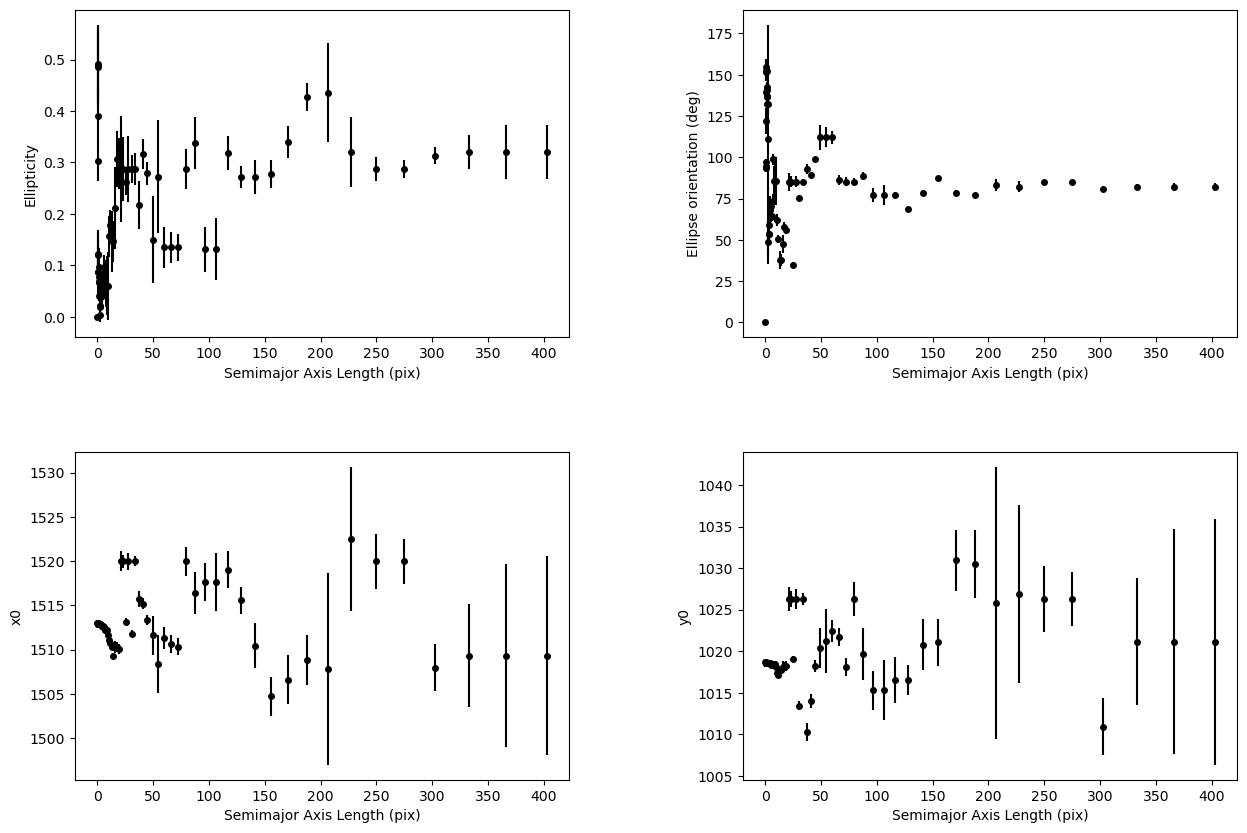

In [52]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.35, wspace=0.35)

plt.subplot(2, 2, 1)
plt.errorbar(isolist.sma, isolist.eps, yerr=isolist.ellip_err,
             fmt='o', markersize=4, color="black")
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('Ellipticity')

plt.subplot(2, 2, 2)
plt.errorbar(isolist.sma, isolist.pa / np.pi * 180.0,
             yerr=isolist.pa_err / np.pi * 80.0, fmt='o', markersize=4, color="black")
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('Ellipse orientation (deg)')

plt.subplot(2, 2, 3)
plt.errorbar(isolist.sma, isolist.x0, yerr=isolist.x0_err, fmt='o',
             markersize=4, color="black")
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('x0')

plt.subplot(2, 2, 4)
plt.errorbar(isolist.sma, isolist.y0, yerr=isolist.y0_err, fmt='o',
             markersize=4,color="black")
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('y0')

plt.savefig('ellipse parameters.png')

In [18]:
from photutils.isophote import build_ellipse_model


model_image = build_ellipse_model(final_image_V.shape, isolist)
residual = final_image_V - model_image

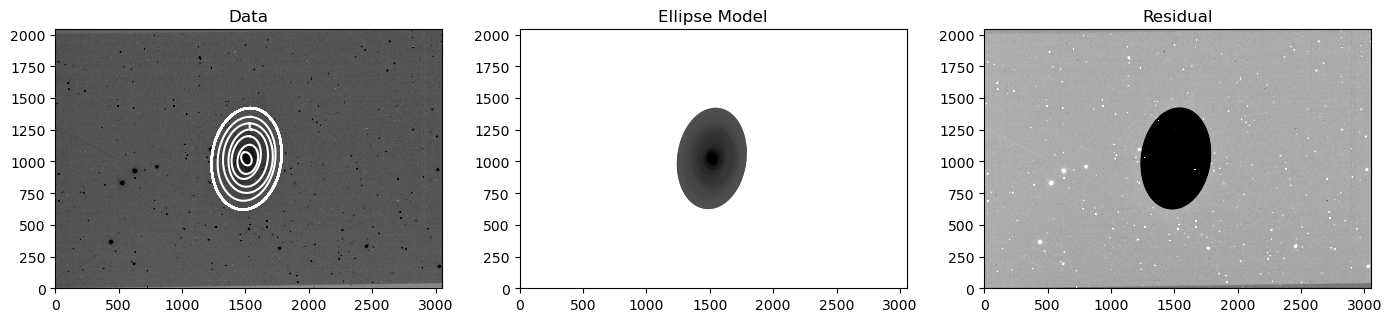

In [19]:
from photutils.datasets import make_noise_image
from photutils.isophote import (Ellipse, EllipseGeometry,
                                build_ellipse_model)

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 5), nrows=1, ncols=3)
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.02, top=0.98)
ax1.imshow(final_image_V, origin='lower', cmap='gist_yarg', vmin=100 , vmax=500)
ax1.set_title('Data')



smas = np.linspace(0, 9000, 160)

for sma in smas:
    iso = isolist.get_closest(sma)
    x, y, = iso.sampled_coordinates()
    ax1.plot(x, y, color='white')

ax2.imshow(model_image, origin='lower', cmap='gist_yarg', vmin=100 , vmax=500)
ax2.set_title('Ellipse Model')
+
ax3.imshow(residual, origin='lower', cmap='gray', vmin=100 , vmax=500)
ax3.set_title('Residual')

plt.savefig('isophotes.png')

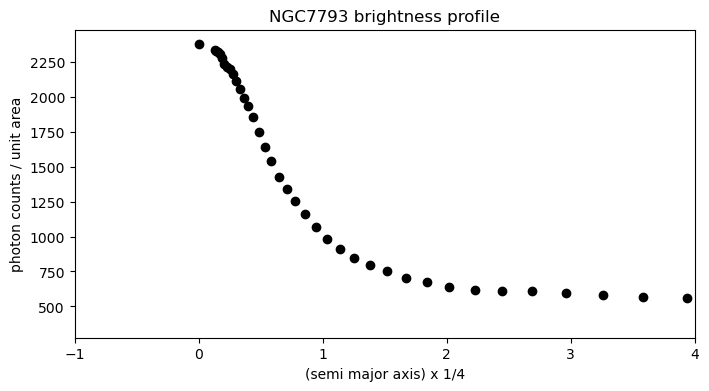

In [70]:
plt.figure(figsize=(8, 4))

plt.scatter(isolist.sma*0.25, isolist.intens, color='black')
plt.xlim([-1,4])
plt.title("NGC7793 brightness profile")
plt.xlabel('(semi major axis) x 1/4')
plt.ylabel('photon counts / unit area')

plt.savefig('Surface brightness of NGC 7793.png')

[[Model]]
    Model(sersic_profile)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 98
    # data points      = 72
    # variables        = 3
    chi-square         = 5548576.34
    reduced chi-square = 80414.1499
    Akaike info crit   = 816.171779
    Bayesian info crit = 823.001777
    R-squared          = 0.83913198
[[Variables]]
    I_e:  24.4005751 +/- 12.9711130 (53.16%) (init = 22)
    r_e:  88.1221371 +/- 54.6421291 (62.01%) (init = 3)
    n:    2.59031487 +/- 0.29746943 (11.48%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(I_e, n)   = -0.9948
    C(I_e, r_e) = -0.9742
    C(r_e, n)   = +0.9530


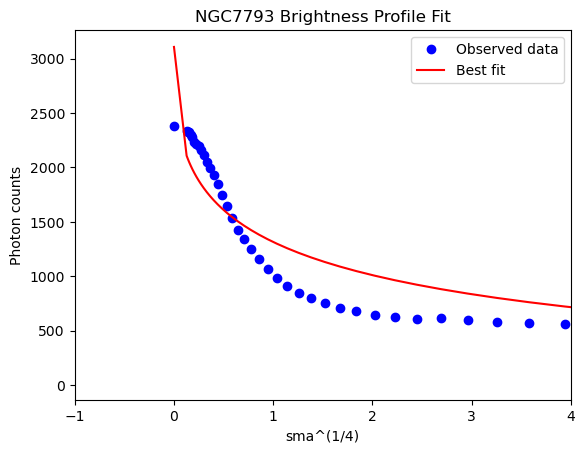

In [401]:
# Sérsic profile function
def sersic_profile(sma, I_e, r_e, n):
    b_n = 2 * n - 1 / 3  # Approximation for b_n
    return I_e * np.exp(-b_n * ((sma / r_e)**(1/n) - 1))

# Example data (replace with your actual data points)


sma = np.array(sma_values)*1/4  # Extracted x-axis data (sma**1/4)
photon_counts = np.array(isolist.intens)  # Extracted y-axis data (magnitudes)

# Create a model
model = Model(sersic_profile)

# Set initial parameter guesses
params = model.make_params(I_e=22, r_e=3.0, n=2)

# Set parameter boundaries if necessary
params['I_e'].set(min=0, max=)   # Intensity must be positive
params['r_e'].set(min=0, max=)   # Effective radius must be positive
params['n'].set(min=0.5, max=20)  # Sérsic index typically between 0.5 and 10

# Fit the model to the data
result = model.fit(photon_counts, params, sma=sma)

# Print the fitting report
print(result.fit_report())

# Plot the data and the best fit
plt.plot(sma, photon_counts, 'bo', label='Observed data')
plt.plot(sma, result.best_fit, 'r-', label='Best fit')
plt.xlabel('sma^(1/4)')
plt.ylabel('Photon counts')
plt.title('NGC7793 Brightness Profile Fit')
plt.xlim([-1,4])
plt.legend()
plt.show()

[[Model]]
    Model(sersic_magnitude)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 69
    # data points      = 72
    # variables        = 3
    chi-square         = 9875166.33
    reduced chi-square = 143118.353
    Akaike info crit   = 857.678467
    Bayesian info crit = 864.508465
    R-squared          = 0.71369260
[[Variables]]
    mag_e:  1851.61704 +/- 498.806293 (26.94%) (init = 20)
    r_e:    2.3739e-04 +/- 7.0510e-04 (297.02%) (init = 1)
    n:      9.99999999 +/- 2.93421699 (29.34%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(mag_e, r_e) = -0.9820
    C(r_e, n)     = -0.9664
    C(mag_e, n)   = +0.9062


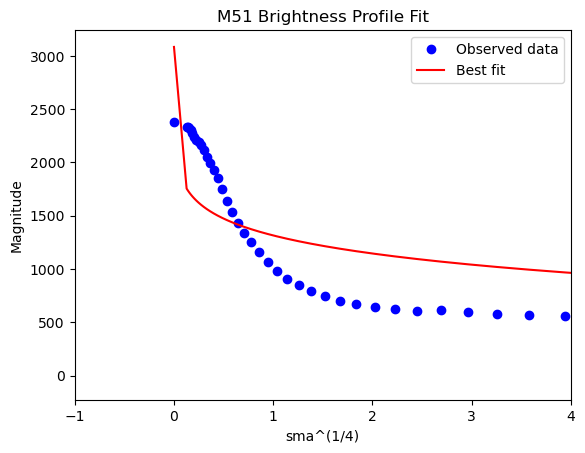

In [392]:
# Define the Sérsic profile in magnitude space (or your chosen function)
def sersic_magnitude(sma, mag_e, r_e, n):
    """ Sérsic profile in magnitude space. """
    b_n = 2 * n - 1 / 3  # Approximation for b_n
    
    # Add safeguards to avoid log of negative numbers or division by zero
    sma_safe = np.where(sma == 0, 1e-6, sma)  # Prevent division by zero
    try:
        return mag_e +  120* np.log10(np.exp(-b_n * ((sma_safe / r_e)**(1/n) - 1)))+ 800
    except:
        return np.inf  # Return a very large value if there's a math error

# Example data (replace with actual data points)
sma = np.array(sma_values)*1/4  # Extracted x-axis data (sma**1/4)
magnitude = np.array(isolist.intens)  # Extracted y-axis data (magnitudes)

# Create an LMFIT Model
model = Model(sersic_magnitude)

# Set initial parameter guesses with constraints
params = model.make_params(mag_e=60, r_e=1, n=2)
params['mag_e'].set(min=0, max=)  # Set bounds for magnitude
params['r_e'].set(min=0,max= 10)              # r_e must be positive
params['n'].set(min=0.5, max=10)      # Sérsic index usually between 0.5 and 10

# Perform the fit
result = model.fit(magnitude, params, sma=sma)

# Print fit report and plot the data and the best fit
print(result.fit_report())

plt.plot(sma, magnitude, 'bo', label='Observed data')
plt.plot(sma, result.best_fit, 'r-', label='Best fit')
plt.xlabel('sma^(1/4)')
plt.ylabel('Magnitude')
plt.xlim([-1,4])
plt.title('M51 Brightness Profile Fit')
plt.legend()
plt.show()